In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.utils import resample
import scipy.stats as st

import random
import seaborn as sns

import statsmodels.api as sm
import math
from math import log
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_subscribers = pd.read_pickle('/content/drive/MyDrive/Copy of subscribers')

In [4]:
df_subscribers.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,revenue_net,join_fee
count,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,151768.000000,192724.000000,192724.000000
mean,2.498624e+07,2.998568,27.997724,1.999848,7.579755e+02,4.0,4.732049,4.512188,16.570832,1.557353,0.115145
std,2.885543e+06,0.748752,4.976341,0.249508,1.920204e+05,0.0,0.101049,0.097078,35.777986,3.068829,0.176971
min,2.000001e+07,0.049049,-32.146760,-0.919933,0.000000e+00,4.0,0.807400,0.770700,-108.000000,-5.982100,-0.660600
25%,2.248998e+07,2.493926,24.401536,1.867354,3.500000e+01,4.0,4.734300,4.514100,2.000000,0.000000,0.036700
50%,2.497011e+07,2.760506,27.301448,1.908159,4.600000e+01,4.0,4.734300,4.514100,8.000000,0.000000,0.036700
75%,2.749020e+07,3.271574,30.201361,1.953559,5.700000e+01,4.0,4.734300,4.514100,13.000000,2.532300,0.110100
max,2.999998e+07,14.335378,76.599962,6.955714,8.172000e+07,4.0,5.101300,5.027900,312.000000,15.634200,0.734000


In [5]:
df_subscribers.isna().sum()

subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
retarget_TF                          0
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
creation_until_cancel_days       75860
cancel_before_trial_end              0
trial_end_date                       0
initial_credit_card_declined         0
revenue_net                      34904
join_fee                         34904
language                 

In [6]:
df_subscribers.reset_index(inplace=True)

In [7]:
df_subscribers.head()

,index,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
2,496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
4,681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [8]:
df_subscribers.groupby(['package_type','retarget_TF'])['retarget_TF'].count()

package_type  retarget_TF
base          False          107963
              True             3501
economy       False           16850
              True              499
enhanced      False           60934
              True             2307
Name: retarget_TF, dtype: int64

In [105]:
df_subscribers.groupby('attribution_technical')['attribution_technical'].count()

attribution_technical
affiliate                   9894
appstore                      44
bing                        1146
bing_organic                 369
brand sem intent bing       2231
brand sem intent google    18524
content_greatist               5
criteo                        44
direct_mail                  139
discovery                   2571
display                     1407
email                      25690
email_blast                 7277
facebook                   80251
facebook_organic            3272
google_organic             10691
influencer                    21
internal                    1122
organic                    22013
other                       1786
ott                          158
pinterest                   6065
pinterest_organic             30
playstore                     12
podcast                      985
quora                        100
referral                    5170
samsung                       86
search                     25306
tv                   

In [9]:
df_subscribers.groupby(['intended_use','retarget_TF'])['retarget_TF'].count()
#根据intended_use 发现每种不同目的的churn rate都在3%左右,但是将近一半的人都是为了access to exclusive content来的。

intended_use                 retarget_TF
access to exclusive content  False          86131
                             True            2908
education                    False           4989
                             True             148
expand international access  False          12597
                             True             381
expand regional access       False          13538
                             True             487
other                        False           6740
                             True             372
replace OTT                  False          66925
                             True            2260
supplement OTT               False          25886
                             True             717
Name: retarget_TF, dtype: int64

In [10]:
df_subscribers.groupby(['preferred_genre','retarget_TF'])['retarget_TF'].count()
#依然是不同genre的churn rate差不多 但是comedy的人数最多，占到53% 

preferred_genre  retarget_TF
comedy           False          120930
                 True             4199
drama            False           45444
                 True             1428
international    False            6203
                 True              201
other            False            3751
                 True              156
regional         False            8689
                 True              301
Name: retarget_TF, dtype: int64

In [11]:
df_subscribers[(df_subscribers['preferred_genre']=='international')&(df_subscribers['intended_use'] == 'access to exclusive content')]

,index,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
201,347841,22452070,base,NaN,international,access to exclusive content,24.401536,NaN,False,51.0,False,UAE,search,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-08-24 04:12:45,0.0,False,2019-09-08,False,0.0000,0.0367,ar,False,False,NaN
339,632795,23175063,base,NaN,international,access to exclusive content,44.700924,NaN,False,27.0,True,UAE,affiliate,other,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2019-08-30 03:03:52,30.0,True,2019-09-14,True,0.0000,0.0367,ar,False,False,NaN
354,157070,24437383,base,4.343785,international,access to exclusive content,25.851492,2.418330,False,65.0,False,UAE,google_organic,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-27 14:54:05,NaN,True,2020-01-11,False,10.3127,0.0367,ar,True,False,CBD
414,289210,29024151,base,3.731089,international,access to exclusive content,27.301448,2.343163,False,66.0,False,UAE,search,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-31 16:06:18,NaN,True,2020-02-15,False,4.5875,0.3303,ar,True,False,Paypal
459,475415,21070262,base,3.635359,international,access to exclusive content,22.951579,2.281230,False,47.0,False,UAE,google_organic,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-03 14:53:49,11.0,False,2019-12-18,False,0.0000,0.3303,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227456,269954,29367708,base,2.988793,international,access to exclusive content,36.001186,1.851582,False,61.0,True,UAE,organic,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-20 12:59:48,11.0,False,2020-01-04,False,0.0000,0.6606,ar,False,False,NaN
227487,269615,20324195,economy,4.055112,international,access to exclusive content,27.301448,2.323277,False,36.0,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 17:49:09,3.0,False,2019-12-21,False,0.0000,0.3303,ar,False,False,NaN
227498,133320,25306093,base,2.361372,international,access to exclusive content,27.301448,1.867833,False,55.0,False,UAE,referral,public_radio,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-06 03:19:46,202.0,True,2019-10-21,False,3.9269,0.0367,ar,True,False,Paypal
227506,344874,27830586,economy,5.256931,international,access to exclusive content,40.351055,2.528470,False,62.0,True,UAE,facebook,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-19 13:57:31,NaN,True,2020-04-03,False,4.5875,0.3303,ar,True,False,Standard Charter


In [12]:
120930/(df_subscribers['retarget_TF'].count())

0.5312615319732195

In [13]:
col_name=df_subscribers.columns.tolist()
for i in range(df_subscribers.shape[0]):
  x = df_subscribers.iloc[i,16]
  if x not in col_name:
    col_name.insert(-1,x) 
df1=df_subscribers.reindex(columns=col_name)   

In [14]:
for i in range(df_subscribers.shape[0]):
  x = df_subscribers.iloc[i,16]
  df1.loc[i,x] = 1


In [15]:
df1.head()

,index,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,base_uae_14_day_trial,high_uae_14_day_trial,low_uae_no_trial,base_eur_14_day_trial,high_aud_14_day_trial,high_sar_14_day_trial,low_gbp_14_day_trial,low_eur_no_trial,base_uae_no_trial_7_day_guarantee,low_sar_no_trial,high_jpy_14_day_trial,payment_type
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard Charter
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df1.isna().sum()

index                                     0
subid                                     0
package_type                          35574
num_weekly_services_utilized         110450
preferred_genre                       36326
intended_use                           3549
weekly_consumption_hour               37930
num_ideal_streaming_services         112170
retarget_TF                               0
age                                   35169
male_TF                                 269
country                                   0
attribution_technical                     0
attribution_survey                     2644
op_sys                                13375
months_per_bill_period                    0
plan_type                                 0
monthly_price                             0
discount_price                            0
account_creation_date                     0
creation_until_cancel_days            75860
cancel_before_trial_end                   0
trial_end_date                  

In [17]:
df1['creation_until_cancel_days'].fillna(999,inplace = True)
df1.dropna(axis=0,subset = ['package_type','preferred_genre'],inplace=True)
df1.fillna(0,inplace = True)

In [18]:
df1.groupby(['plan_type','cancel_before_trial_end'])['creation_until_cancel_days'].max()

plan_type              cancel_before_trial_end
base_eur_14_day_trial  False                       11.0
                       True                       999.0
base_uae_14_day_trial  False                       15.0
                       True                       999.0
high_aud_14_day_trial  False                        7.0
                       True                       999.0
high_sar_14_day_trial  False                       14.0
                       True                       999.0
high_uae_14_day_trial  False                       15.0
                       True                       999.0
low_gbp_14_day_trial   False                        6.0
                       True                       999.0
Name: creation_until_cancel_days, dtype: float64

In [19]:
df1.groupby(['cancel_before_trial_end','refund_after_trial_TF'])['subid'].count()

cancel_before_trial_end  refund_after_trial_TF
False                    False                    104481
True                     False                     78600
                         True                       8142
Name: subid, dtype: int64

In [20]:
df1.head()

,index,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,base_uae_14_day_trial,high_uae_14_day_trial,low_uae_no_trial,base_eur_14_day_trial,high_aud_14_day_trial,high_sar_14_day_trial,low_gbp_14_day_trial,low_eur_no_trial,base_uae_no_trial_7_day_guarantee,low_sar_no_trial,high_jpy_14_day_trial,payment_type
0,162502,21724479,economy,0.000000,comedy,access to exclusive content,0.000000,0.000000,False,0.0,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,999.0,True,2020-02-08,False,0.0,0.0000,ar,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard Charter
1,380374,23383224,base,0.000000,comedy,access to exclusive content,22.951579,0.000000,False,70.0,False,UAE,facebook,facebook,0,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,356799,29417030,base,0.000000,drama,replace OTT,20.051667,0.000000,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [107]:
df_subscribers.groupby('plan_type')['creation_until_cancel_days'].mean()

plan_type
base_eur_14_day_trial                21.100000
base_uae_14_day_trial                16.554463
base_uae_no_trial_7_day_guarantee          NaN
high_aud_14_day_trial                 7.000000
high_jpy_14_day_trial                17.000000
high_sar_14_day_trial                14.250000
high_uae_14_day_trial                18.895833
low_eur_no_trial                     12.000000
low_gbp_14_day_trial                  4.333333
low_sar_no_trial                           NaN
low_uae_no_trial                     53.264151
Name: creation_until_cancel_days, dtype: float64

In [22]:
df_engagement = pd.read_pickle('/content/drive/MyDrive/Copy of engagement')
df_engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [23]:
df_engagement.isna().sum()

subid                                  0
date                                   0
app_opens                          34611
cust_service_mssgs                 34611
num_videos_completed               34611
num_videos_more_than_30_seconds    34611
num_videos_rated                   34611
num_series_started                 34611
payment_period                         0
dtype: int64

In [24]:
df_engagement.shape

(2585724, 9)

In [25]:
df_customer_service = pd.read_pickle('/content/drive/MyDrive/Copy of customer_service_reps')
df_customer_service['renew'].fillna(0,inplace = True)
df_customer_service['renew'].replace(True,1,inplace = True)
df_customer_service

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,0
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,0
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,0
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,0
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,0
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,0
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,0
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,0


In [26]:
df_customer_service['renew'].unique()

array([0, 1], dtype=object)

In [27]:
df_customer_service.isna().sum()

customer_service_rep_id          0
subid                            0
current_sub_TF                   0
cancel_date                1354081
account_creation_date            0
num_trial_days                   0
trial_completed_TF               0
billing_channel                  0
revenue_net_1month               0
payment_period                   0
last_payment                     0
next_payment               1369360
renew                            0
dtype: int64

In [28]:
df_customer_service.describe()

,customer_service_rep_id,subid,num_trial_days,revenue_net_1month,payment_period
count,2.208643e+06,2.208643e+06,2.208643e+06,2.208643e+06,2.208643e+06
mean,3.504146e+07,2.499531e+07,1.298418e+01,2.248010e+00,5.850402e-01
std,2.808791e+06,2.887118e+06,3.102689e+00,2.222221e+00,1.003588e+00
min,3.000466e+07,2.000000e+07,0.000000e+00,-7.596900e+00,0.000000e+00
25%,3.273768e+07,2.249642e+07,1.400000e+01,0.000000e+00,0.000000e+00
50%,3.500128e+07,2.499127e+07,1.400000e+01,1.137700e+00,0.000000e+00
75%,3.739152e+07,2.749480e+07,1.400000e+01,4.587500e+00,1.000000e+00
max,3.999743e+07,3.000000e+07,1.400000e+01,1.038610e+01,1.200000e+01


In [29]:
df_customer_service.groupby('num_trial_days')['renew'].sum()

num_trial_days
0         71
7          0
14    218510
Name: renew, dtype: int64

In [104]:
df_customer_service.groupby('renew')['num_trial_days'].mean()

renew
0    12.873105
1    13.995452
Name: num_trial_days, dtype: float64

In [103]:
df_customer_service.groupby('num_trial_days')['payment_period'].mean()

num_trial_days
0     1.656832
7     1.615457
14    0.457414
Name: payment_period, dtype: float64

In [32]:
#for i in df_customer_service['subid']:
    #df_customer_service[df_customer_service['subid']==i].shape[0]>1
    #df_customer_service[df_customer_service['subid']==i]['paid_after_trial'] = 1


In [33]:
a = df_customer_service[df_customer_service['payment_period']==1]['subid'].count()

In [34]:
b = df_customer_service[df_customer_service['payment_period']==0]['subid'].count()

In [35]:
pct_paid_after_trail = a/b

In [36]:
print(pct_paid_after_trail)

0.4245800958111819


In [37]:
df_customer_service.groupby('renew').sum()

,customer_service_rep_id,subid,current_sub_TF,num_trial_days,trial_completed_TF,revenue_net_1month,payment_period
renew,,,,,,,
0,69733578270111,49743769861361,685382,25618278,1329123,4.050877e+06,1240280
1,7660500753520,5461943366696,132906,3059140,218581,9.141735e+05,51865


**K-means**

In [38]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [39]:
enc = OneHotEncoder(handle_unknown='ignore')
X = df1.iloc[:,:].values

label_encoder_X = LabelEncoder()
X[:,2] = label_encoder_X.fit_transform(X[:,2])
X[:,4] = label_encoder_X.fit_transform(X[:,4])
X[:,12] = label_encoder_X.fit_transform(X[:,12])
X[:,21] = label_encoder_X.fit_transform(X[:,21])
X[:,23] = label_encoder_X.fit_transform(X[:,23])
X[:,16] = label_encoder_X.fit_transform(X[:,16])

,group,index,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,base_eur_14_day_trial,high_aud_14_day_trial,high_sar_14_day_trial,low_gbp_14_day_trial,low_eur_no_trial,base_uae_no_trial_7_day_guarantee,low_sar_no_trial,high_jpy_14_day_trial,payment_type,No_trial,low_priced,high_priced
0,1,162502,21724479,economy,0.000000,comedy,access to exclusive content,0.000000,0.000000,False,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard Charter,0.0,1.0,0.0
1,2,380374,23383224,base,0.000000,comedy,access to exclusive content,22.951579,0.000000,False,70.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
2,3,496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
3,3,356799,29417030,base,0.000000,drama,replace OTT,20.051667,0.000000,False,30.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
4,2,681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,2,509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
227624,2,229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paypal,0.0,1.0,0.0
227625,2,281340,24799085,base,0.000000,comedy,access to exclusive content,31.651317,0.000000,False,45.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
227626,1,87198,21308040,base,0.000000,comedy,access to exclusive content,0.000000,0.000000,False,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Paypal,0.0,1.0,0.0


In [40]:
Z = pd.DataFrame(X)
Z = Z.drop(columns = [0,1,5,11,13,14,19,22,23,26,27,28,40,29,30,31,32,33,34,35,36,37,38,39,20,9])
Z

,2,3,4,6,7,8,10,12,15,16,17,18,21,24,25
0,1,0,0,0,0,False,False,13,4,1,4.7343,4.5141,1,0,0
1,0,0,0,22.9516,0,False,False,13,4,1,4.7343,4.5141,0,0,0.3303
2,2,3.36289,4,36.0012,1.95178,False,True,18,4,1,4.7343,4.5141,0,0,0.1101
3,0,0,1,20.0517,0,False,False,28,4,1,4.7343,4.5141,0,0,0.0367
4,0,3.73109,0,22.9516,2.50638,False,False,9,4,1,4.7343,4.5141,0,0,0.0367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191218,2,2.59408,0,28.7514,1.90548,False,False,13,4,1,4.7343,4.5141,0,0,0.3303
191219,2,2.36137,0,27.3014,1.83519,True,False,15,4,1,4.7343,4.5141,1,4.5875,0.3303
191220,0,0,0,31.6513,0,False,False,13,4,1,4.7343,4.5141,1,0,0.0367
191221,0,0,0,0,0,False,False,13,4,1,4.7343,4.5141,1,0,0


In [41]:
df1.shape

(191223, 41)

In [42]:
kmeans = KMeans(n_clusters=3)
res = kmeans.fit(Z)
print(res)


KMeans(n_clusters=3)


In [43]:
y = res.predict(Z)
y = y.tolist()
len(y)

191223

In [44]:
#df1.drop(columns = 'group',inplace = True)
df1.insert(0,'group',y)


In [45]:
df1.head()

,group,index,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,base_uae_14_day_trial,high_uae_14_day_trial,low_uae_no_trial,base_eur_14_day_trial,high_aud_14_day_trial,high_sar_14_day_trial,low_gbp_14_day_trial,low_eur_no_trial,base_uae_no_trial_7_day_guarantee,low_sar_no_trial,high_jpy_14_day_trial,payment_type
0,0,162502,21724479,economy,0.000000,comedy,access to exclusive content,0.000000,0.000000,False,0.0,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,999.0,True,2020-02-08,False,0.0,0.0000,ar,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard Charter
1,1,380374,23383224,base,0.000000,comedy,access to exclusive content,22.951579,0.000000,False,70.0,False,UAE,facebook,facebook,0,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2,356799,29417030,base,0.000000,drama,replace OTT,20.051667,0.000000,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [46]:
df1['group'] = df1['group']+1

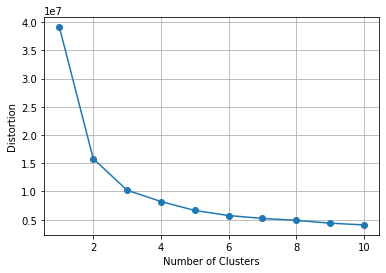

In [47]:
distortions=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,
              init='k-means++',
              n_init=10,
              max_iter=300,
              random_state=0)
    km.fit(Z)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.grid()
plt.savefig("./fig3.png")
plt.show()


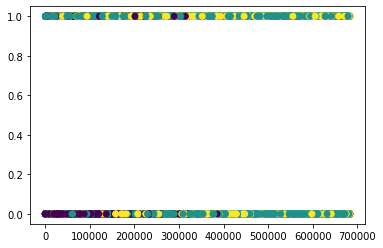

In [48]:
plt.scatter(df1.iloc[:,1],df1.iloc[:,11],c = y)
plt.show()

In [109]:
df1.groupby('group')['revenue_net'].agg(['mean','sum'])

,mean,sum
group,,
1,0.036361,1314.8876
2,1.243310,135251.0238
3,1.474037,68215.5011


In [135]:
df3.groupby('group')['num_weekly_services_utilized'].agg(['mean','sum'])

,mean,sum
group,,
1,0.015688,803.040252
2,2.235754,174979.043062
3,2.319105,83520.238539


有一些age大于1000的值，自己填写的数据有问题。

In [51]:
df1.groupby('group')['age'].mean()

group
1       1.588435
2    1059.687144
3     428.027356
Name: age, dtype: float64

In [52]:
df1.groupby('group')['preferred_genre'].nunique()

group
1    5
2    5
3    5
Name: preferred_genre, dtype: int64

In [53]:
df1.groupby('group')['plan_type'].count()

group
1     36162
2    108783
3     46278
Name: plan_type, dtype: int64

In [54]:
df1.head()

,group,index,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,base_uae_14_day_trial,high_uae_14_day_trial,low_uae_no_trial,base_eur_14_day_trial,high_aud_14_day_trial,high_sar_14_day_trial,low_gbp_14_day_trial,low_eur_no_trial,base_uae_no_trial_7_day_guarantee,low_sar_no_trial,high_jpy_14_day_trial,payment_type
0,1,162502,21724479,economy,0.000000,comedy,access to exclusive content,0.000000,0.000000,False,0.0,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,999.0,True,2020-02-08,False,0.0,0.0000,ar,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard Charter
1,2,380374,23383224,base,0.000000,comedy,access to exclusive content,22.951579,0.000000,False,70.0,False,UAE,facebook,facebook,0,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,356799,29417030,base,0.000000,drama,replace OTT,20.051667,0.000000,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2,681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [55]:
df1['No_trial'] = df1['low_eur_no_trial']+df1['low_eur_no_trial']+df1['base_uae_no_trial_7_day_guarantee']+df1['low_sar_no_trial']+df1['low_uae_no_trial']
df1['low_priced'] = df1['low_uae_no_trial']+df1['base_eur_14_day_trial']+df1['low_gbp_14_day_trial']+df1['low_eur_no_trial']+df1['base_uae_no_trial_7_day_guarantee']+df1['low_sar_no_trial']+df1['base_uae_14_day_trial']
df1['high_priced'] = df1['high_uae_14_day_trial']+df1['high_aud_14_day_trial']+df1['high_sar_14_day_trial']+df1['high_jpy_14_day_trial']


In [56]:
df2 = df1[['subid','group']]
df2

,subid,group
0,21724479,1
1,23383224,2
2,26844789,3
3,29417030,3
4,26723159,2
...,...,...
227623,21434712,2
227624,25843074,2
227625,24799085,2
227626,21308040,1


In [57]:
df3 = pd.merge(df_customer_service,df1,on = 'subid')

In [58]:
df3

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date_x,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,group,index,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date_y,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,base_uae_14_day_trial,high_uae_14_day_trial,low_uae_no_trial,base_eur_14_day_trial,high_aud_14_day_trial,high_sar_14_day_trial,low_gbp_14_day_trial,low_eur_no_trial,base_uae_no_trial_7_day_guarantee,low_sar_no_trial,high_jpy_14_day_trial,payment_type,No_trial,low_priced,high_priced
0,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False,2,537732,base,0.000000,drama,access to exclusive content,30.201361,0.000000,False,56.0,False,UAE,affiliate,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:59:06,12.0,False,2020-04-11,False,0.0000,0.3303,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
1,34138852,20407871,False,2020-04-01 05:42:28,2020-03-27 23:58:49,14,False,OTT,0.0000,0,2020-03-27 23:58:49,NaT,False,3,575153,base,2.670664,comedy,supplement OTT,28.751405,1.939364,False,33.0,False,UAE,referral,referral,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:58:49,5.0,False,2020-04-11,False,0.0000,0.0000,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
2,33808892,27818002,False,2020-04-08 22:00:59,2020-03-27 23:53:40,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False,3,306223,enhanced,4.423316,drama,access to exclusive content,30.201361,2.322935,False,34.0,False,UAE,organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:53:40,12.0,False,2020-04-11,False,0.0000,0.3303,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
3,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,0,2020-03-28 07:10:03,2020-04-11 14:22:46,1,3,218040,base,3.080107,drama,replace OTT,34.551230,1.859332,False,63.0,False,UAE,organic,other,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:52:29,999.0,True,2020-04-11,False,4.5875,0.0367,ar,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard Charter,0.0,1.0,0.0
4,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,1,2020-04-11 14:22:46,NaT,False,3,218040,base,3.080107,drama,replace OTT,34.551230,1.859332,False,63.0,False,UAE,organic,other,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:52:29,999.0,True,2020-04-11,False,4.5875,0.0367,ar,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard Charter,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165462,37678911,24811320,False,2019-07-02 23:43:28,2019-06-30 00:32:09,14,False,OTT,0.0000,0,2019-06-30 00:32:09,NaT,False,2,360817,enhanced,0.000000,regional,access to exclusive content,24.401536,0.000000,False,62.0,False,UAE,brand sem intent bing,social_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 00:32:09,2.0,False,2019-07-15,False,0.0000,0.0000,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
165463,36080216,27196054,True,NaT,2019-06-30 00:01:56,14,True,OTT,4.5875,0,2019-06-30 00:01:56,2019-07-14 14:34:33,1,1,17638,economy,0.000000,comedy,access to exclusive content,0.000000,0.000000,False,0.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 00:01:56,999.0,True,2019-07-15,False,0.0000,0.0000,ar,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [59]:
df3.groupby('group')['current_sub_TF'].mean()

group
1    0.667976
2    0.277548
3    0.344810
Name: current_sub_TF, dtype: float64

In [60]:
df3.groupby(['group','attribution_technical'])['attribution_technical'].count()

group  attribution_technical  
1      affiliate                    784
       bing                           1
       brand sem intent bing         42
       brand sem intent google     3795
       discovery                     31
       display                        4
       email                       6620
       email_blast                 1197
       facebook                   25079
       facebook_organic             354
       google_organic              1633
       internal                      14
       organic                     4738
       other                          5
       pinterest                    608
       podcast                       95
       referral                    1766
       search                      4420
       vod                            1
       youtube                        2
2      affiliate                   4543
       appstore                      41
       bing                         773
       bing_organic                 310
       br

In [61]:
df3.groupby(['group','op_sys'])['op_sys'].count()

group  op_sys 
1      0              1
       Android    11274
       iOS        39914
2      0              1
       Android    27622
       iOS        50641
3      Android    11554
       iOS        24460
Name: op_sys, dtype: int64

In [62]:
df3.groupby(['group','discount_price'])['discount_price'].count()

group  discount_price
1      4.5141            51189
2      3.7801                4
       4.0737                6
       4.2205                5
       4.3673                1
       4.5141            77948
       5.0279              300
3      3.7801                1
       4.2205                6
       4.5141            35934
       5.0279               73
Name: discount_price, dtype: int64

In [63]:
df3.groupby(['group','current_sub_TF','intended_use'])['intended_use'].count()

group  current_sub_TF  intended_use               
1      False           0                                  5
                       access to exclusive content     8537
                       expand international access        2
                       other                             91
                       replace OTT                     6616
                       supplement OTT                  1745
       True            0                                  6
                       access to exclusive content    19185
                       other                            223
                       replace OTT                    11725
                       supplement OTT                  3054
2      False           0                                 62
                       access to exclusive content    25467
                       education                         28
                       expand international access       68
                       expand regional access    

In [64]:
df3.groupby(['group','current_sub_TF','preferred_genre'])['preferred_genre'].count()

group  current_sub_TF  preferred_genre
1      False           comedy             13296
                       drama               3159
                       international        162
                       other                 54
                       regional             325
       True            comedy             26613
                       drama               6616
                       international        310
                       other                115
                       regional             539
2      False           comedy             36084
                       drama              14010
                       international       1978
                       other               1422
                       regional            3048
       True            comedy             11275
                       drama               6347
                       international       1333
                       other                905
                       regional            1862
3

In [133]:
df3.groupby(['group','current_sub_TF','monthly_price'])['monthly_price'].count()

group  current_sub_TF  monthly_price
1      False           4.7343           16996
       True            4.7343           34193
2      False           4.3673               3
                       4.4407               2
                       4.7343           56315
                       5.1013             222
       True            4.0003               4
                       4.3673               3
                       4.4407               3
                       4.7343           21634
                       5.1013              78
3      False           4.0003               1
                       4.4407               6
                       4.7343           23528
                       5.1013              61
       True            4.7343           12406
                       5.1013              12
Name: monthly_price, dtype: int64

In [131]:
df3.groupby('group')['paid_TF'].mean()

group
1    0.996620
2    0.424640
3    0.509246
Name: paid_TF, dtype: float64

In [67]:
df3.groupby('group')['revenue_net_1month'].sum()

group
1    221073.1297
2    134762.1064
3     72730.0782
Name: revenue_net_1month, dtype: float64

In [129]:
df3.groupby('group')['revenue_net_1month'].mean()

group
1    4.318762
2    1.721891
3    2.019495
Name: revenue_net_1month, dtype: float64

In [127]:
df3.groupby('group')['cancel_before_trial_end'].mean()

group
1    0.996972
2    0.459151
3    0.543372
Name: cancel_before_trial_end, dtype: float64

In [125]:
df3.groupby('group')['join_fee'].mean()

group
1    0.000721
2    0.127493
3    0.161654
Name: join_fee, dtype: float64

In [70]:
df3.groupby('group')['high_priced'].sum()

group
1      0.0
2    310.0
3     74.0
Name: high_priced, dtype: float64

In [71]:
df3.groupby(['group','male_TF'])['male_TF'].count()

group  male_TF
1      False      48953
       True        2236
2      False      67514
       True       10750
3      False      29714
       True        6300
Name: male_TF, dtype: int64

In [123]:
df.groupby('group')['low_priced'].mean()

KeyError: ignored

In [73]:
df3.groupby('group')['No_trial'].sum()

group
1    0.0
2    0.0
3    0.0
Name: No_trial, dtype: float64

In [74]:
df4 = pd.merge(df_subscribers,df_customer_service,on = 'subid')

In [75]:
df4.groupby('num_trial_days')['current_sub_TF'].mean()

num_trial_days
0     0.600000
14    0.372195
Name: current_sub_TF, dtype: float64

In [76]:
df_customer_service.groupby('num_trial_days')['current_sub_TF'].mean()

num_trial_days
0     0.375597
7     0.235604
14    0.381293
Name: current_sub_TF, dtype: float64

In [121]:
df1.groupby(['group','intended_use'])['intended_use'].count()

group  intended_use               
1      0                                  9
       access to exclusive content    19401
       expand international access        1
       expand regional access             1
       other                            498
       replace OTT                    12870
       supplement OTT                  3382
2      0                                126
       access to exclusive content    49392
       education                         45
       expand international access      121
       expand regional access           121
       other                           3873
       replace OTT                    38934
       supplement OTT                 16171
3      0                                113
       access to exclusive content    20246
       education                          9
       expand international access       24
       expand regional access            33
       other                           1423
       replace OTT                    173

In [77]:
df3.to_csv('df3.csv')

In [112]:
df3

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date_x,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,group,index,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date_y,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,base_uae_14_day_trial,high_uae_14_day_trial,low_uae_no_trial,base_eur_14_day_trial,high_aud_14_day_trial,high_sar_14_day_trial,low_gbp_14_day_trial,low_eur_no_trial,base_uae_no_trial_7_day_guarantee,low_sar_no_trial,high_jpy_14_day_trial,payment_type,No_trial,low_priced,high_priced
0,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False,2,537732,base,0.000000,drama,access to exclusive content,30.201361,0.000000,False,56.0,False,UAE,affiliate,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:59:06,12.0,False,2020-04-11,False,0.0000,0.3303,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
1,34138852,20407871,False,2020-04-01 05:42:28,2020-03-27 23:58:49,14,False,OTT,0.0000,0,2020-03-27 23:58:49,NaT,False,3,575153,base,2.670664,comedy,supplement OTT,28.751405,1.939364,False,33.0,False,UAE,referral,referral,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:58:49,5.0,False,2020-04-11,False,0.0000,0.0000,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
2,33808892,27818002,False,2020-04-08 22:00:59,2020-03-27 23:53:40,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False,3,306223,enhanced,4.423316,drama,access to exclusive content,30.201361,2.322935,False,34.0,False,UAE,organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:53:40,12.0,False,2020-04-11,False,0.0000,0.3303,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
3,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,0,2020-03-28 07:10:03,2020-04-11 14:22:46,1,3,218040,base,3.080107,drama,replace OTT,34.551230,1.859332,False,63.0,False,UAE,organic,other,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:52:29,999.0,True,2020-04-11,False,4.5875,0.0367,ar,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard Charter,0.0,1.0,0.0
4,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,1,2020-04-11 14:22:46,NaT,False,3,218040,base,3.080107,drama,replace OTT,34.551230,1.859332,False,63.0,False,UAE,organic,other,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-27 23:52:29,999.0,True,2020-04-11,False,4.5875,0.0367,ar,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard Charter,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165462,37678911,24811320,False,2019-07-02 23:43:28,2019-06-30 00:32:09,14,False,OTT,0.0000,0,2019-06-30 00:32:09,NaT,False,2,360817,enhanced,0.000000,regional,access to exclusive content,24.401536,0.000000,False,62.0,False,UAE,brand sem intent bing,social_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 00:32:09,2.0,False,2019-07-15,False,0.0000,0.0000,ar,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
165463,36080216,27196054,True,NaT,2019-06-30 00:01:56,14,True,OTT,4.5875,0,2019-06-30 00:01:56,2019-07-14 14:34:33,1,1,17638,economy,0.000000,comedy,access to exclusive content,0.000000,0.000000,False,0.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-06-30 00:01:56,999.0,True,2019-07-15,False,0.0000,0.0000,ar,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

A B testing

In [78]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample
import scipy.stats as st

import random
import seaborn as sns
import matplotlib.pylab as plt

import statsmodels.api as sm
import math
from math import log

In [79]:
df_customer_service.groupby('num_trial_days')['current_sub_TF'].mean()

num_trial_days
0     0.375597
7     0.235604
14    0.381293
Name: current_sub_TF, dtype: float64

In [80]:
df = df_customer_service
df

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,0
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,0
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,0
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,0
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,0
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,0
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,0
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,0


In [81]:
df.loc[df['current_sub_TF']==False,'tf']=0
df.loc[df['current_sub_TF']==True,'tf']=1

In [82]:
df.loc[df['num_trial_days']==7,'Trial_days_TF']=1
df.loc[df['num_trial_days']==0,'Trial_days_TF']=0
df.loc[df['num_trial_days']==14,'Trial_days_TF']=1

In [83]:
df

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,tf,Trial_days_TF
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,0,0.0,1.0
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,0,0.0,1.0
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,0,0.0,1.0
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,0,0.0,1.0
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,0,0.0,0.0
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,0,0.0,0.0
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,0,0.0,0.0
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,0,0.0,0.0


In [84]:
df_AB = df[['tf','Trial_days_TF']]

In [85]:
df_AB

,tf,Trial_days_TF
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,1.0,1.0
...,...,...
2248409,0.0,0.0
2248410,0.0,0.0
2248411,0.0,0.0
2248412,0.0,0.0


In [86]:
df_A = df_AB[df.Trial_days_TF == 1]
df_B = df_AB[df.Trial_days_TF == 0]

In [87]:
df_A

,tf,Trial_days_TF
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,1.0,1.0
...,...,...
2248401,1.0,1.0
2248402,0.0,1.0
2248403,0.0,1.0
2248404,0.0,1.0


In [88]:
df_B

,tf,Trial_days_TF
10,1.0,0.0
11,1.0,0.0
12,1.0,0.0
13,1.0,0.0
14,1.0,0.0
...,...,...
2248409,0.0,0.0
2248410,0.0,0.0
2248411,0.0,0.0
2248412,0.0,0.0


In [89]:
size_A = df_A.shape[0]
size_B = df_B.shape[0]

In [90]:
con_rate_A = df_A.tf.mean()
con_rate_B = df_B.tf.mean()

In [91]:
con_rate_A

0.3703018530219361

In [92]:
con_rate_B

0.3755971885239751

In [93]:
con_rate_A-con_rate_B

-0.005295335502039034

In [94]:
std_A = np.std(df_A.tf)

H0:μ1=μ0 ; H1:μ1<**μ0**

In [95]:
z = (con_rate_B-con_rate_A)/(math.sqrt(con_rate_A*(1-con_rate_A)/size_B))
z

3.100846673207423

In [96]:
st.norm.ppf(0.95)

1.6448536269514722

z is bigger than 1.6448, so reject H0. Alternative B improved conversion rates over alternative A.

In [97]:
delta = con_rate_B-con_rate_A
con_rate_avg = (con_rate_A+con_rate_B)/2
sample_size = (st.norm.ppf(0.05)*\
     math.sqrt(2*con_rate_avg*(1-con_rate_avg))+\
     st.norm.ppf(0.2)*math.sqrt(con_rate_A*(1-con_rate_A)+con_rate_B*(1-con_rate_B)))**2/\
    (delta)**2
sample_size = int(sample_size)
sample_size

103123

In [98]:
sample=[]
for i in range(10):
    s = df_B.sample(n=50000,axis=0)
    sample.append(s)
    pvalue = sm.stats.ztest(df_A.tf, sample[i].tf,alternative='smaller')[1]
    print(i+1,") ",pvalue)

1 )  0.004089641335831975
2 )  0.005927445381303782
3 )  8.7690567584144e-05
4 )  0.010557797495485468
5 )  0.02303788929194166
6 )  0.0020899848788965064
7 )  0.0032858516170040514
8 )  0.021111678474266746
9 )  0.04703317251360403
10 )  0.004089641335831975


In [99]:
z_score = []
for i in range(10):
    sample_mean = sample[i].tf.mean()
    z = (sample_mean-con_rate_A)/(math.sqrt(con_rate_A*(1-con_rate_A)/sample_size))
    z_score.append(z)
    print(i+1,") ",z)

1 )  3.842573681322614
2 )  3.6563685475911694
3 )  5.451918051430074
4 )  3.3504601136037877
5 )  2.8982476459702733
6 )  4.1617824820050755
7 )  3.948976614883435
8 )  2.951449112750702
9 )  2.4327348116416796
10 )  3.842573681322614


All of the z-scores are larger than 1.6448, so reject H0.

Alternative B improved conversion rates over alternative A.

In [100]:
ln_A = log(1/0.05)
ln_B = log(0.2)

In [101]:
sample_1=sample[0]

In [102]:
iteration = []
for i in range(10):
    lambda_n = 0
    n = 0
    for j in range(sample_size):
        mean_A = df_A.tf.mean()
        mean_sample = sample[i].tf.mean()
        lambda_0 = log((1-mean_sample)/(1-mean_A))
        lambda_1 = log((mean_sample)/(mean_A))
        if sample[i].iloc[j,1] == 1:
            lambda_n = lambda_n + lambda_1
        else:
            lambda_n = lambda_n + lambda_0
        if lambda_n > ln_B and lambda_n < ln_A:
            n = n+1
        elif lambda_n <= ln_B:
            print('For sample',i+1,', accept H0 and itertaion is ',n+1)
            iteration.append(n)
            break
        elif lambda_n >= ln_A:
            print('For sample',i+1,', accept H1 and itertaion is ',n+1)
            iteration.append(n)
            break

For sample 1 , accept H0 and itertaion is  175
For sample 2 , accept H0 and itertaion is  184
For sample 3 , accept H0 and itertaion is  123
For sample 4 , accept H0 and itertaion is  201
For sample 5 , accept H0 and itertaion is  232
For sample 6 , accept H0 and itertaion is  162
For sample 7 , accept H0 and itertaion is  170
For sample 8 , accept H0 and itertaion is  228
For sample 9 , accept H0 and itertaion is  277
For sample 10 , accept H0 and itertaion is  175


In [140]:
df1[(df1['age']<=100)&(df1['age']!=0)].groupby('group')['age'].mean()

group
1    50.378906
2    47.242922
3    43.240585
Name: age, dtype: float64

In [142]:
df3[(df3['age']<=100)&(df3['age']!=0)].groupby('group')['age'].mean()

group
1    46.689076
2    47.349000
3    43.573159
Name: age, dtype: float64

In [147]:
df4.columns

Index(['index', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date_x',
       'creation_until_cancel_days', 'cancel_before_trial_end',
       'trial_end_date', 'initial_credit_card_declined', 'revenue_net',
       'join_fee', 'language', 'paid_TF', 'refund_after_trial_TF',
       'payment_type', 'customer_service_rep_id', 'current_sub_TF',
       'cancel_date', 'account_creation_date_y', 'num_trial_days',
       'trial_completed_TF', 'billing_channel', 'revenue_net_1month',
       'payment_period', 'last_payment', 'next_payment', 'renew'],
      dtype='object')

In [170]:
df_subscribers.columns

Index(['index', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [172]:
df_customer_service

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,tf,Trial_days_TF,churn_TF
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,0,0.0,1.0,False
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,0,0.0,1.0,False
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,0,0.0,1.0,False
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,0,0.0,1.0,False
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,0,1.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,0,0.0,0.0,False
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,0,0.0,0.0,False
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,0,0.0,0.0,False
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,0,0.0,0.0,False


In [176]:
y = df_customer_service.iloc[:,:].values

label_encoder_X = LabelEncoder()
y[:,7] = label_encoder_X.fit_transform(y[:,7])


In [190]:
df_customer_service.columns

Index(['customer_service_rep_id', 'subid', 'current_sub_TF', 'cancel_date',
       'account_creation_date', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period',
       'last_payment', 'next_payment', 'renew', 'tf', 'Trial_days_TF',
       'churn_TF'],
      dtype='object')

In [191]:
df = pd.DataFrame(y,columns=['customer_service_rep_id', 'subid', 'current_sub_TF', 'cancel_date',
       'account_creation_date', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period',
       'last_payment', 'next_payment', 'renew', 'tf', 'Trial_days_TF',
       'churn_TF'])

In [192]:
df

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,tf,Trial_days_TF,churn_TF
0,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,2,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,0,0,1,False
1,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,2,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,0,0,1,False
2,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,2,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,0,0,1,False
3,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,2,1.1377,3,2020-01-26 03:30:29,NaT,0,0,1,False
4,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,2,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,0,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208638,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,1,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,0,0,0,False
2208639,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,1,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,0,0,0,False
2208640,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,1,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,0,0,0,False
2208641,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,1,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,0,0,0,False



RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                 2.796e+05
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:27:08   Log-Likelihood:            -6.4753e+05
No. Observations:             1546050   AIC:                         1.295e+06
Df Residuals:                 1546045   BIC:                         1.295e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
num

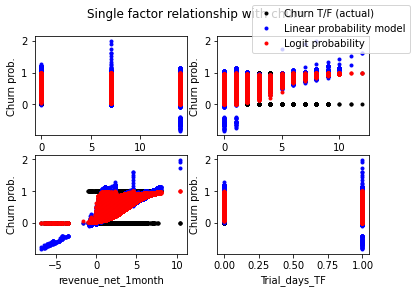

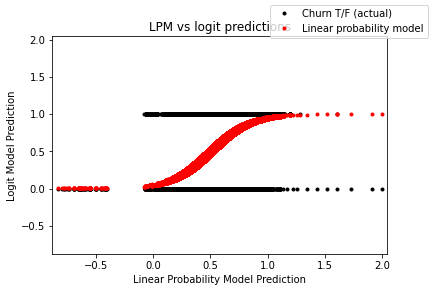

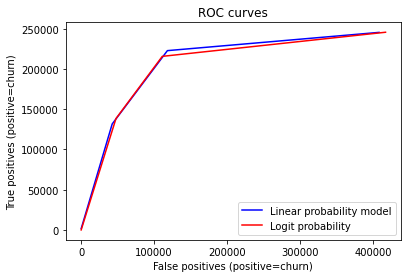

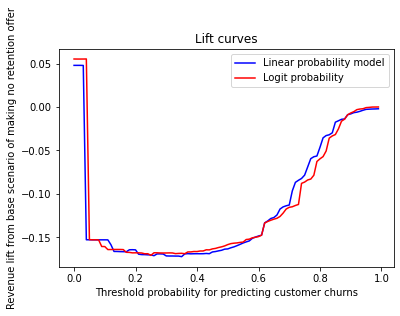

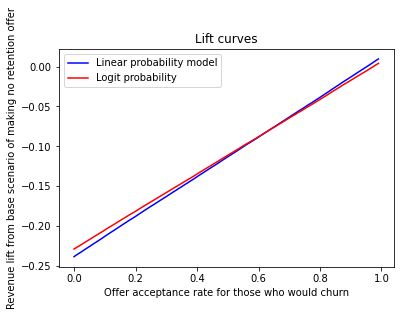

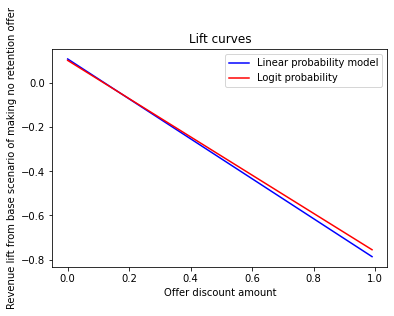

In [196]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math

pd.options.display.max_columns = 25
df = df_customer_service


# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 0, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact


def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

# ----- READ IN DATA -----
df_train, df_test = model_selection.train_test_split(df, test_size=0.3)

# ----- FIT CHURN MODEL ------
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = ['num_trial_days','payment_period','revenue_net_1month','Trial_days_TF']    # list of x covariates
add_constant_TF = True

# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())

# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 2
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols)
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.7
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])


In [197]:
df_engagement

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [199]:
df_churn = df_customer_service[['subid','churn_TF']]

In [202]:
df_churn1 = pd.merge(df_churn,df_engagement,on = 'subid')

In [207]:
df_churn1.dropna(inplace = True)


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                 1.057e+04
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:44:38   Log-Likelihood:            -2.7382e+06
No. Observations:             3876621   AIC:                         5.476e+06
Df Residuals:                 3876616   BIC:                         5.476e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

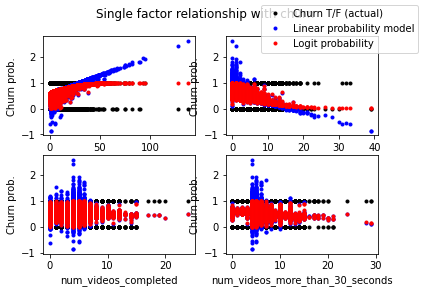

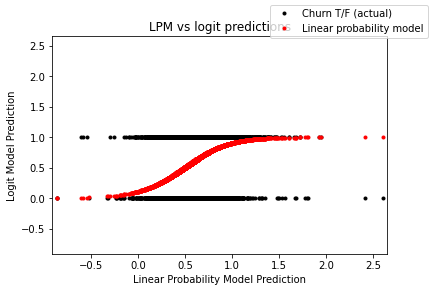

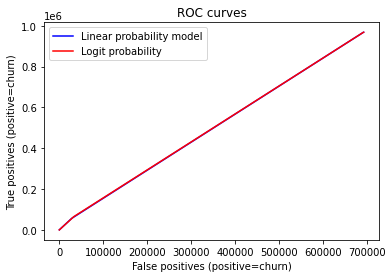

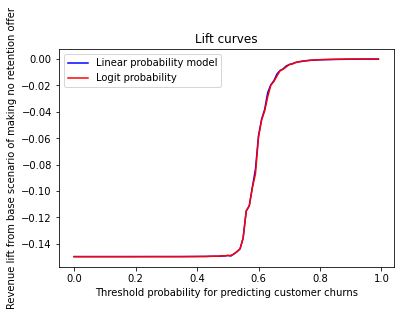

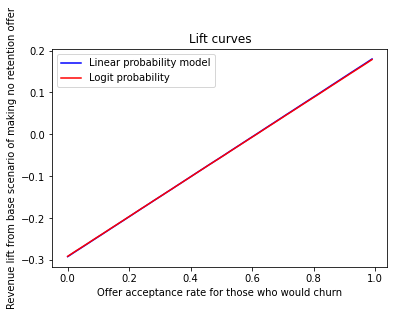

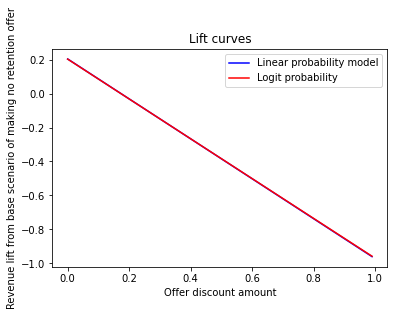

In [209]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
import copy
import math

pd.options.display.max_columns = 25
df = df_churn1


# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 0, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact


def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

# ----- READ IN DATA -----
df_train, df_test = model_selection.train_test_split(df, test_size=0.3)

# ----- FIT CHURN MODEL ------
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = ['app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',]    # list of x covariates
add_constant_TF = True

# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())

# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 2
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols)
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.7
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
